# Unsupervised ML Checkpoint

This checkpoint is designed to test your understanding of unsupervised machine learning.

Specifically, this will cover:

* Performing clustering analysis of data, including interpreting silhouette scores
* Creating visualizations using unsupervised ML

## Your Task: Use Unsupervised ML to Investigate a Sensor Dataset

### Data Understanding

You will be using a dataset ([source](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)) generated from embedded sensors (accelerometer and gyroscope) in a smartphone worn on a person's waist. Additional processing and feature engineering has already been applied to the data, including noise filters, resulting in a 561-feature vector.

In the cell below, we load the data into a `pandas` dataframe:

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np

df = pd.read_csv("sensor_data.csv")
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


### Data Processing and Visualization

As you can see, this dataset has many features (561 total). There is also likely to be high multicollinearity between these features due to the feature engineering process, which repeatedly used some of the same raw sensor data (e.g. "tBodyAcc-mean()") to generate different columns. The code below will step through a technique called Principal Component Analysis (PCA), which will greatly reduce the dimensionality of our problem.

Your task is to look for some underlying patterns in this data using k-means clustering. You do not need to perform a train-test split.

First you'll need to scale the data, which is an important first step in PCA.

## 1. Prepare Data for Principal Component Analysis (PCA)

Instantiate a `StandardScaler` and use it to create a scaled variable called `data_scaled`.

In [ ]:
# CodeGrade step1
# Replace None with appropriate code

# Import relevant class
None

# Create scaled variable
data_scaled = None
data_scaled

# Convert data_scaled to a DataFrame for readability
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled

In [3]:
# data_scaled should have the same shape as df
assert data_scaled.shape == df.shape

# data_scaled should not be the same as df
assert data_scaled.loc[0,"angle(Z,gravityMean)"] != df.loc[0,"angle(Z,gravityMean)"]

## Perform PCA on the Dataset (Run Cells without Changes)

In [4]:
# Run this cell without changes

from sklearn.decomposition import PCA
pca_transformer = PCA(n_components=0.95, random_state=42)
pca_data = pca_transformer.fit_transform(data_scaled)
pca_data

array([[-16.13854371,   2.15202401,   3.14478025, ...,  -1.68153546,
         -1.20932492,  -1.17572672],
       [-15.2961943 ,   1.38714378,  -0.68222107, ...,  -1.34739246,
          0.14947399,  -0.73061489],
       [-15.13701861,   2.47335094,  -1.75664057, ...,   0.13803147,
          0.66226306,  -0.22741812],
       ...,
       [ 14.33343587, -12.26071193,   4.0259462 , ...,  -1.32974137,
         -0.08800409,  -0.09253083],
       [ 12.87601895, -14.07125595,   2.91606098, ...,  -0.79743323,
         -0.71168419,   0.56868751],
       [ 13.01610365, -12.24426121,   1.33604965, ...,  -0.043166  ,
         -0.34681818,  -0.67183662]])

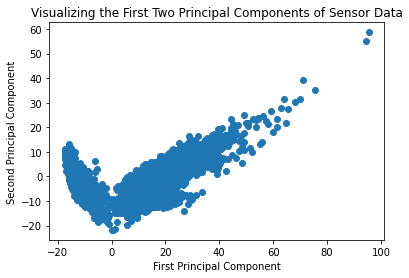

In [5]:
# Run this cell without changes
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x=pca_data[:, 0], y=pca_data[:, 1])
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_title("Visualizing the First Two Principal Components of Sensor Data");

## 2. Interpret a Silhouette Plot to Perform Clustering Analysis

You handed the PCA-transformed dataset to a coworker, who produced this silhouette plot. Interpret the plot to choose the optimal number of clusters, then use the scikit-learn `KMeans` class ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) to instantiate a KMeans model.

<!-- 
k_values = range(2,21)
silhouette_scores = [0.41540858143541637,
 0.3438069022316109,
 0.1775373667655337,
 0.1425018071505172,
 0.12365576879282861,
 0.11917044787937144,
 0.09524343091496036,
 0.09155853204663812,
 0.09410174137993227,
 0.09335504033772586,
 0.09386447654377134,
 0.09518329181757086,
 0.0864125952331548,
 0.08622712573000349,
 0.08350384589108541,
 0.07589314716366936,
 0.06926851258928322,
 0.06980908513512903,
 0.0710121422731501]

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(k_values, silhouette_scores, color="green", marker="s", )
ax.set_xticks(k_values)
ax.set_xlabel("k in KMeans")
ax.set_ylabel("Silhouette Score")
ax.set_title("Silhouette Scores for KMeans Models of Varying K Values");
-->

![plot of silhouette scores, with the highest y value at an x value of 2](silhouette_score_plot.png)

Call the model `kmeans`, and use a `random_state` of 42.

In [ ]:
# CodeGrade step2
# Replace None with appropriate code

# Import relevant model
None

# Instantiate KMeans model
kmeans = None

# Fit the model on pca_data, using the best n_clusters value as indicated by the plot above
None

kmeans

In [7]:
# kmeans should be a fitted KMeans model with as many dimensions in cluster
# centers as principal components
assert kmeans.cluster_centers_.shape[1] == pca_data.shape[1]

## 3. Update the Plot to Reflect the Clusters

Use the `kmeans` object to identify the labels for each data point in `pca_data`. Then modify the plotting code below so that the color of each dot on the scatterplot indicates which cluster the data point belongs to.

***Hint:*** The `c` keyword argument in the `scatter` method allows you to control the color of the dots.

In [ ]:
# CodeGrade step3
# Replace None with appropriate code
cluster_labels = None

fig, ax = plt.subplots()

# Modify the below line of code to specify the color:
scatter = ax.scatter(x=pca_data[:, 0], y=pca_data[:, 1])

# The rest of the code can be run as-is:
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_title("Visualizing the First Two Principal Components of Sensor Data")
# Un-comment the below line to add a legend once you have specified the color
# ax.legend(*scatter.legend_elements(fmt="Cluster {x:.0f}"));

In [9]:
# cluster_labels should be a NumPy array
assert type(cluster_labels) == np.ndarray

In [10]:
# Plot should have the same number of colors as kmeans has clusters
assert len(scatter.legend_elements()[0]) == kmeans.n_clusters